In [12]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score
from tensorflow.keras import Sequential, Input, layers


import sys
sys.path.append('../src')

from utils.data import get_csv_from_bq,select_tomo_ids


In [4]:
#df = get_csv_from_bq()
#df.head(10)

In [5]:
df = pd.read_csv('../data/csv_raw/train_labels.csv')
df.head(10)

,Unnamed: 0,row_id,tomo_id,Motor_axis_0,Motor_axis_1,Motor_axis_2,Array_shape_axis_0,Array_shape_axis_1,Array_shape_axis_2,Voxel_spacing,Number_of_motors
0,0,16,tomo_049310,-1.0,-1.0,-1.0,500,924,956,19.7,0
1,1,30,tomo_098751,-1.0,-1.0,-1.0,500,924,956,16.1,0
2,2,54,tomo_136c8d,-1.0,-1.0,-1.0,500,924,956,19.7,0
3,3,59,tomo_146de2,-1.0,-1.0,-1.0,500,924,956,16.1,0
4,4,84,tomo_1dc5f9,-1.0,-1.0,-1.0,500,924,956,19.7,0
5,5,121,tomo_28f9c1,-1.0,-1.0,-1.0,500,924,956,16.1,0
6,6,173,tomo_39b15b,-1.0,-1.0,-1.0,500,924,956,16.1,0
7,7,181,tomo_3b8291,-1.0,-1.0,-1.0,500,924,956,19.7,0
8,8,193,tomo_40b215,-1.0,-1.0,-1.0,500,924,956,16.1,0
9,9,219,tomo_4baff0,-1.0,-1.0,-1.0,500,924,956,16.1,0


In [85]:
df_no_1 = df[(df['tomo_id'].isin(tomo_ids_1)) & (df['Number_of_motors']==1)]
df_no_1.head(10)

,Unnamed: 0,row_id,tomo_id,Motor_axis_0,Motor_axis_1,Motor_axis_2,Array_shape_axis_0,Array_shape_axis_1,Array_shape_axis_2,Voxel_spacing,Number_of_motors
404,404,8,tomo_01a877,147.0,638.0,286.0,300,960,928,13.1,1
405,405,12,tomo_033ebe,88.0,711.0,308.0,300,960,928,13.1,1
406,406,14,tomo_0363f2,50.0,574.0,392.0,300,960,928,13.1,1
407,407,43,tomo_0f9df0,94.0,174.0,599.0,300,960,928,15.6,1
408,408,45,tomo_0fe63f,197.0,362.0,265.0,300,960,928,13.1,1
409,409,48,tomo_10c564,16.0,455.0,267.0,300,960,928,13.1,1
410,410,51,tomo_12f896,95.0,404.0,212.0,300,960,928,13.1,1
411,411,58,tomo_1446aa,149.0,293.0,601.0,300,960,928,13.1,1
412,412,60,tomo_16136a,141.0,566.0,443.0,300,960,928,16.8,1
413,413,62,tomo_16efa8,183.0,379.0,752.0,300,960,928,13.1,1


In [86]:
print('y size ',df_no_1['Array_shape_axis_1'].value_counts())
print('x size ',df_no_1['Array_shape_axis_2'].value_counts())

y size  960    195
Name: Array_shape_axis_1, dtype: int64
x size  928    195
Name: Array_shape_axis_2, dtype: int64


In [39]:
x_size = df_no_1['Array_shape_axis_2'].min()
y_size = df_no_1['Array_shape_axis_1'].max()
print(x_size,y_size)

928 960


In [87]:
tomo_ids_1 = select_tomo_ids(df, number_of_slices=[300], number_of_motors=[1],
                y_shape_range=(960, 960), x_shape_range=(928, 928))
tomo_ids_1


404    tomo_01a877
405    tomo_033ebe
406    tomo_0363f2
407    tomo_0f9df0
408    tomo_0fe63f
          ...     
594    tomo_f78e91
595    tomo_f871ad
596    tomo_fc3c39
597    tomo_fc5ae4
598    tomo_fd5b38
Name: tomo_id, Length: 195, dtype: object

In [16]:
!ls
!ls ../data/pictures_process/mean_image/

BenedettaVeronesi_dataviz.ipynb     data_viz_willian.ipynb
BenedettaVeronesi_lreg_mean.ipynb   pierrero_visualisation_moteur.ipynb
ThomasDenoirjean.ipynb
image_moyenne_tomo_003acc.jpg image_moyenne_tomo_813916.jpg
image_moyenne_tomo_00e047.jpg image_moyenne_tomo_81445c.jpg
image_moyenne_tomo_00e463.jpg image_moyenne_tomo_8174f5.jpg
image_moyenne_tomo_01a877.jpg image_moyenne_tomo_821255.jpg
image_moyenne_tomo_02862f.jpg image_moyenne_tomo_823bc7.jpg
image_moyenne_tomo_0308c5.jpg image_moyenne_tomo_82d780.jpg
image_moyenne_tomo_0333fa.jpg image_moyenne_tomo_8351d1.jpg
image_moyenne_tomo_033ebe.jpg image_moyenne_tomo_84997e.jpg
image_moyenne_tomo_03437b.jpg image_moyenne_tomo_8554af.jpg
image_moyenne_tomo_0363f2.jpg image_moyenne_tomo_85708b.jpg
image_moyenne_tomo_040b80.jpg image_moyenne_tomo_85edfd.jpg
image_moyenne_tomo_049310.jpg image_moyenne_tomo_85fa87.jpg
image_moyenne_tomo_04d42b.jpg image_moyenne_tomo_8634ee.jpg
image_moyenne_tomo_05b39c.jpg image_moyenne_tomo_868255.jpg
image_

In [89]:
import os
import glob
#from keras.preprocessing.image import array_to_img, img_to_array, load_img

dir_mean_image = '../data/pictures_process/mean_image/'
keywords = tomo_ids_1


motor1_images = [fname for fname in os.listdir(dir_mean_image)
                   if any(kw in fname for kw in keywords)]

motor1_images

all_images = glob.glob(dir_mean_image+"/**/*.jpg", recursive=True)
filtered_image_paths = [p for p in all_images if os.path.basename(p) in motor1_images]
filtered_image_paths


#X =
#y = df[]

['../data/pictures_process/mean_image/image_moyenne_tomo_2483bb.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_8554af.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_6acb9e.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_918e2b.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_95e699.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_99a3ce.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_9986f0.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_b03f81.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_ea3f3a.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_2c607f.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_2c9da1.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_8e4f7d.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_331130.jpg',
 '../data/pictures_process/mean_image/image_moyenne_tomo_c649f8.jpg',
 '../data/pictures_p

In [41]:
#keras.utils.image_dataset_from_directory(
#    dir_mean_image,
#    labels="inferred",
    #label_mode="int",
    #class_names=None,
    #color_mode="rgb",
 #   batch_size=32,
 #   image_size=(x_size, y_size),
 #   shuffle=True,
 #   seed=None,
 #   validation_split=0.2,
    #subset=None,
    #interpolation="bilinear",
    #follow_links=False,
    #crop_to_aspect_ratio=False,
    #pad_to_aspect_ratio=False,
    #data_format=None,
    #verbose=True,
#)


In [92]:
df_no_1['motor_coord'] = df_no_1.apply(lambda row: (row['Motor_axis_2'], row['Motor_axis_1']), axis=1)
df_no_1['motor_coord']

/var/folders/nj/wg4pl11n6hb1zcpwyf6khsxr0000gn/T/ipykernel_7346/3440169400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_1['motor_coord'] = df_no_1.apply(lambda row: (row['Motor_axis_2'], row['Motor_axis_1']), axis=1)


404    (286.0, 638.0)
405    (308.0, 711.0)
406    (392.0, 574.0)
407    (599.0, 174.0)
408    (265.0, 362.0)
            ...      
594    (387.0, 469.0)
595    (115.0, 642.0)
596    (491.0, 537.0)
597    (313.0, 513.0)
598    (627.0, 520.0)
Name: motor_coord, Length: 195, dtype: object

In [95]:
print(len(labels))
print(len(path_ds))

195
195


In [94]:
import tensorflow as tf
import numpy as np

labels = np.array(df_no_1['motor_coord'].tolist(), dtype=np.float32)

def preprocess(path,label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, [x_size, y_size])
    img = tf.cast(img, tf.float32) / 255.0  # normalize to [0, 1]
    return img,label

#dataset = tf.data.Dataset.from_tensor_slices(filtered_image_paths)
# Create a dataset of (path, label) pairs
path_ds = tf.data.Dataset.from_tensor_slices(filtered_image_paths)
label_ds = tf.data.Dataset.from_tensor_slices(labels)  # same order as paths

full_dataset = tf.data.Dataset.zip((path_ds, label_ds))

dataset = full_dataset.map(preprocess)
dataset = dataset.shuffle(1000).batch(32)

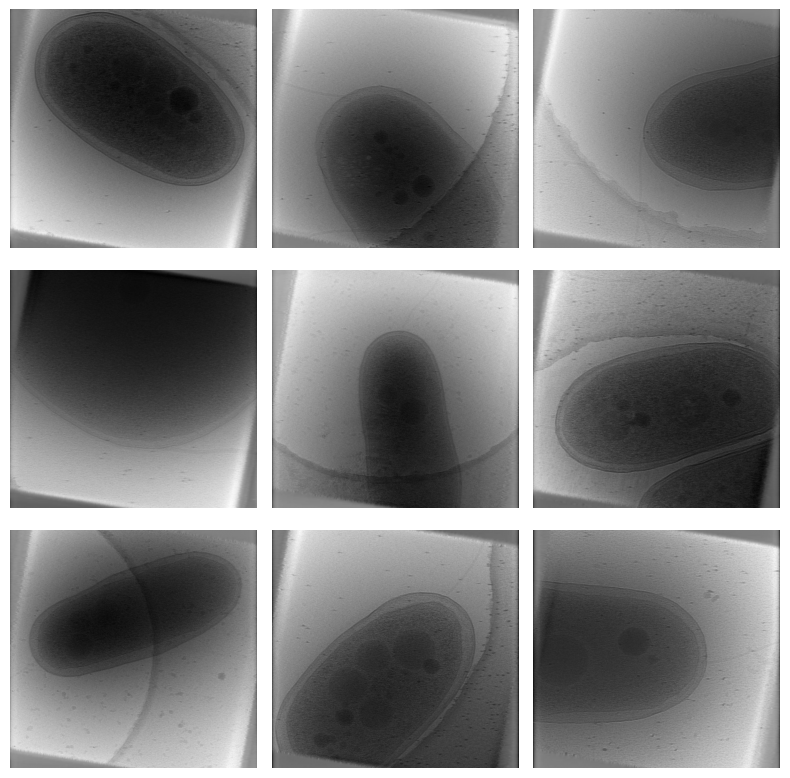

In [105]:
import matplotlib.pyplot as plt

# Take one batch (e.g., 32 images)
for batch in dataset.take(1):
    images, _ = batch  # just images
    break

# Plot first 9 images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = tf.squeeze(images[i])
    plt.imshow(img.numpy(),cmap='gray')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [50]:
df

,Unnamed: 0,row_id,tomo_id,Motor_axis_0,Motor_axis_1,Motor_axis_2,Array_shape_axis_0,Array_shape_axis_1,Array_shape_axis_2,Voxel_spacing,Number_of_motors
0,0,16,tomo_049310,-1.0,-1.0,-1.0,500,924,956,19.7,0
1,1,30,tomo_098751,-1.0,-1.0,-1.0,500,924,956,16.1,0
2,2,54,tomo_136c8d,-1.0,-1.0,-1.0,500,924,956,19.7,0
3,3,59,tomo_146de2,-1.0,-1.0,-1.0,500,924,956,16.1,0
4,4,84,tomo_1dc5f9,-1.0,-1.0,-1.0,500,924,956,19.7,0
...,...,...,...,...,...,...,...,...,...,...,...
732,732,99,tomo_226cd8,366.0,693.0,269.0,500,928,960,13.1,10
733,733,100,tomo_226cd8,386.0,693.0,319.0,500,928,960,13.1,10
734,734,101,tomo_226cd8,388.0,671.0,433.0,500,928,960,13.1,10
735,735,102,tomo_226cd8,411.0,318.0,740.0,500,928,960,13.1,10


In [108]:
def initiate_model():

    model = Sequential()
     ### First Convolution & MaxPooling
    model.add(Input(shape=(x_size, y_size, 1)))
    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))
    model.add(layers.Conv2D(64, (4,4), activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size=(3, 3)))

    ## Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10,activation='relu'))

    model.add(layers.Dense(2,activation='linear'))

    return model

In [109]:
model = initiate_model()
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 926, 958, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 308, 319, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 305, 316, 64)      32832     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 101, 105, 64)     0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 678720)            0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [102]:
def compile_model(model):
    ### Model compilation
    model.compile(loss='mse',optimizer='adam',metrics=['mse'])
    return model


In [115]:
dataset_size = len(filtered_image_paths)
val_size = int(0.2 * dataset_size)
test_size = int(0.2 * dataset_size)

# Shuffle the full dataset first (already done in your case)
full_dataset = full_dataset.shuffle(dataset_size, seed=42)

# Split into train and val
train_ds = full_dataset.skip(val_size+test_size)
val_ds = full_dataset.take(val_size)
test_ds = full_dataset.take(test_size)

# Preprocess both
train_ds = train_ds.map(preprocess).batch(32)
val_ds = val_ds.map(preprocess).batch(32)
test_ds = test_ds.map(preprocess).batch(32)


In [111]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

model = initiate_model()
model = compile_model(model)

es = EarlyStopping(patience=10)
history = model.fit(
      train_ds,
      validation_data=val_ds,
      #shuffle= True,
      batch_size=32,
      epochs=50,
      callbacks=[es],
      verbose=1
      )

Epoch 1/50
5/5 [==============================] - 48s 9s/step - loss: 246361.5781 - mse: 246361.5781 - val_loss: 150594.5469 - val_mse: 150594.5469
Epoch 2/50
5/5 [==============================] - 46s 9s/step - loss: 71726.8359 - mse: 71726.8359 - val_loss: 97837.8438 - val_mse: 97837.8438
Epoch 3/50
5/5 [==============================] - 43s 8s/step - loss: 81662.1016 - mse: 81662.1016 - val_loss: 39116.3516 - val_mse: 39116.3516
Epoch 4/50
5/5 [==============================] - 45s 9s/step - loss: 30693.1758 - mse: 30693.1758 - val_loss: 47261.1250 - val_mse: 47261.1250
Epoch 5/50
5/5 [==============================] - 45s 9s/step - loss: 45982.3750 - mse: 45982.3750 - val_loss: 36347.7773 - val_mse: 36347.7773
Epoch 6/50
5/5 [==============================] - 44s 9s/step - loss: 34397.8633 - mse: 34397.8633 - val_loss: 30179.3750 - val_mse: 30179.3750
Epoch 7/50
5/5 [==============================] - 48s 10s/step - loss: 36199.2227 - mse: 36199.2227 - val_loss: 28891.6680 - val_mse

In [113]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[0].set_ylim(20000,170000)
    ax[1].set_title('mse')
    ax[1].plot(history.epoch, history.history["mse"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_mse"], label="Validation ,mse")
    ax[1].set_ylim(20000,170000)
    ax[0].legend()
    ax[1].legend()

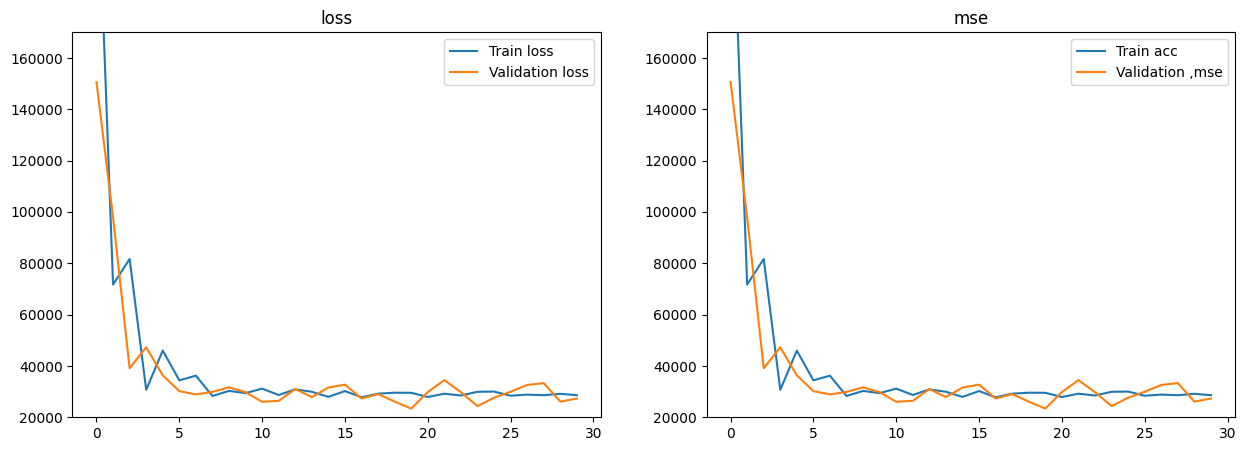

In [114]:
plot_history(history)
